### Exploratory Data Analysis (EDA)

* Descriptive Statistics: Summary statistics for job loss and economic indicators.
* Visualization: Histograms, box plots, scatter plots, and heatmaps to visualize relationships.
* Correlation Analysis: Calculate correlation coefficients to identify potential relationships.


Data used: 

https://raw.githubusercontent.com/HAZCHEM234/My_data/main/merged_unemployment_and_gdp.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data from the provided URL
file_path = "https://raw.githubusercontent.com/HAZCHEM234/My_data/main/merged_unemployment_and_gdp.csv"
df = pd.read_csv(file_path)

# Descriptive statistics:

Calculate summary statistics for job loss and economic indicators (GDP and Unemployment Rate).



In [3]:
# Summary statistics
summary_stats = df.describe()
summary_stats


,date,GDP Nominal (in millions),GDP Real (in millions),unemployment rate
count,7.000000,7.000000,7.000000,7.000000
mean,2020.000000,338750.857143,265212.142857,4.083571
std,2.160247,42909.629508,14548.658351,0.513889
min,2017.000000,286455.000000,243732.000000,3.297000
25%,2018.500000,311079.000000,256487.500000,3.756500
50%,2020.000000,323461.000000,261891.000000,4.109000
75%,2021.500000,367018.500000,277679.000000,4.465000
max,2023.000000,405145.000000,282529.000000,4.736000


# Visualization

Use various plots to visualize relationships between GDP, Unemployment Rate, and years.

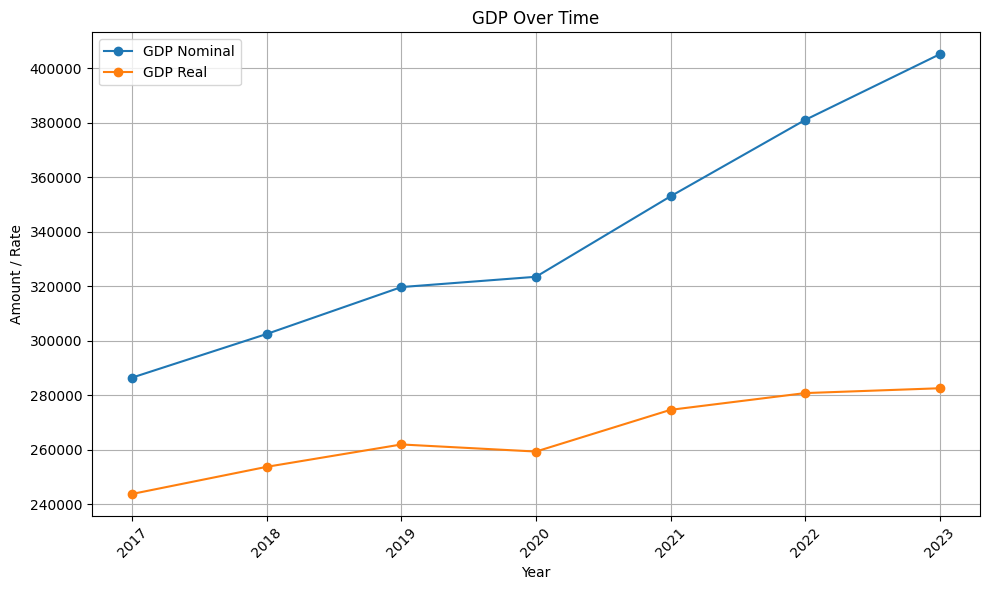

In [4]:
# 1. Time Series Plot for GDP and Unemployment Rate
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['GDP Nominal (in millions)'], marker='o', label='GDP Nominal')
plt.plot(df['date'], df['GDP Real (in millions)'], marker='o', label='GDP Real')
plt.xlabel('Year')
plt.ylabel('Amount / Rate')
plt.title('GDP Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

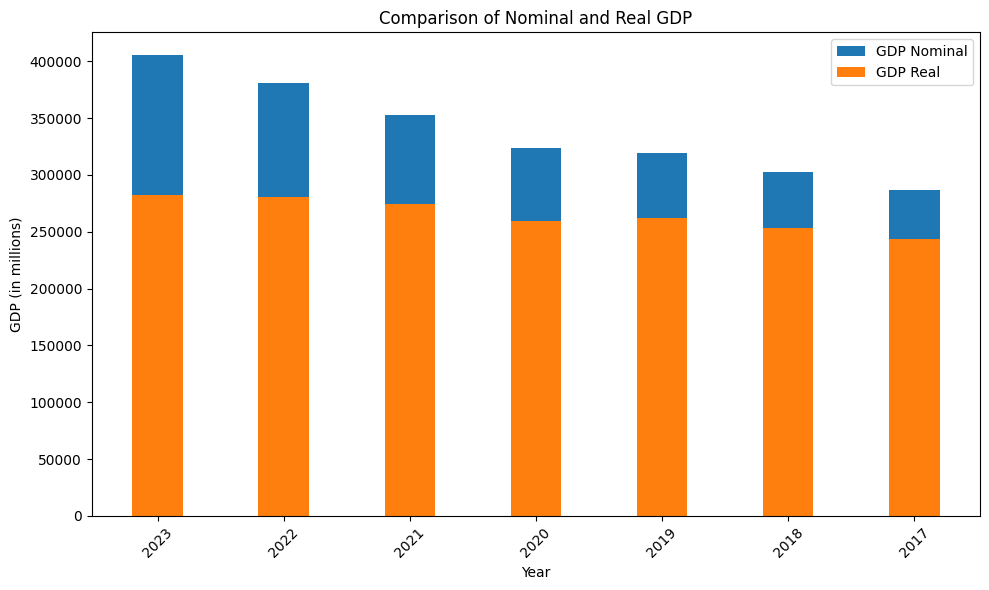

In [5]:
# 2. Bar Chart Comparison
plt.figure(figsize=(10, 6))
plt.bar(df['date'].astype(str), df['GDP Nominal (in millions)'], width=0.4, label='GDP Nominal')
plt.bar(df['date'].astype(str), df['GDP Real (in millions)'], width=0.4, label='GDP Real')
plt.xlabel('Year')
plt.ylabel('GDP (in millions)')
plt.title('Comparison of Nominal and Real GDP')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

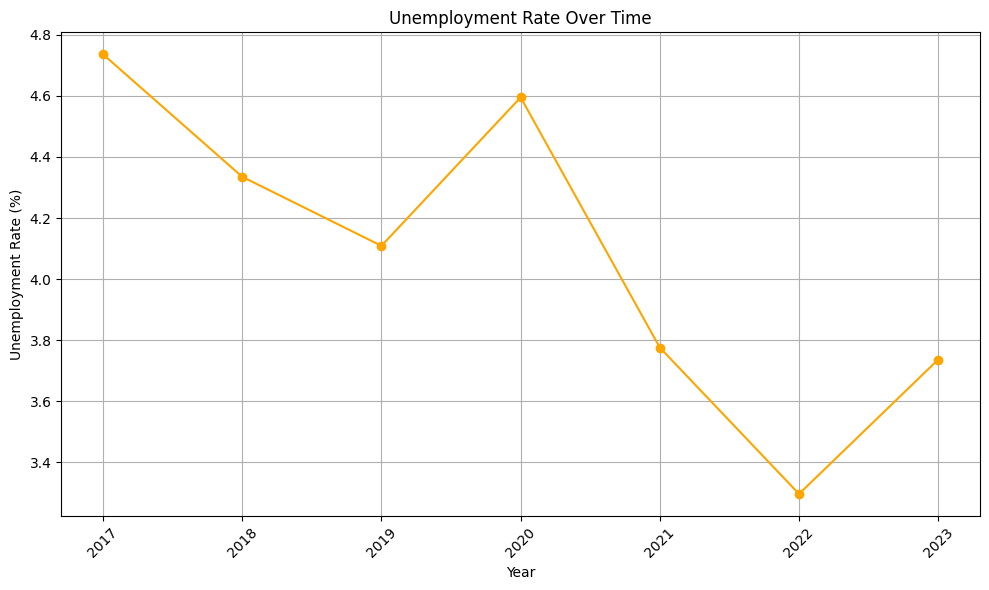

In [6]:
# 3. Line Plot for Unemployment Rate
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['unemployment rate'], marker='o', color='orange')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation 

### finding correlation between unemployment rate and GDP real

In [7]:
# Calculate correlation between unemployment rate and GDP Real
correlation_Real = df['unemployment rate'].corr(df['GDP Real (in millions)'])
correlation_Nominal = df['unemployment rate'].corr(df['GDP Nominal (in millions)'])

print(f"Correlation between Unemployment Rate and GDP Real: {correlation_Real}")
print(f"Correlation between Unemployment Rate and GDP Nominal: {correlation_Nominal}")

Correlation between Unemployment Rate and GDP Real: -0.9171355562968455
Correlation between Unemployment Rate and GDP Nominal: -0.8480264994969147


In [8]:
# Create a DataFrame
correlations_df = pd.DataFrame({
    'Variable': ['GDP Real (in millions)', 'GDP Nominal (in millions)'],
    'Correlation with Unemployment Rate': [correlation_Real, correlation_Nominal]
})

correlations_df

,Variable,Correlation with Unemployment Rate
0,GDP Real (in millions),-0.917136
1,GDP Nominal (in millions),-0.848026


A correlation coefficient of -0.917 indicates a strong negative correlation between the unemployment rate and GDP Real (in millions). Here's what it means:

Strength of Relationship: The closer the correlation coefficient is to -1 or 1, the stronger the relationship between the two variables. In this case, -0.917 suggests a very strong negative relationship.

Negative Correlation: A negative correlation means that as one variable (unemployment rate) increases, the other variable (GDP Real) tends to decrease, and vice versa.

In practical terms:

When the unemployment rate increases, GDP Real tends to decrease significantly.
Conversely, when GDP Real increases, the unemployment rate tends to decrease significantly.
This strong negative correlation suggests that changes in the unemployment rate are closely associated with changes in GDP Real over the years in your dataset.

# Hypotehsis testing

Define Hypothesis

Let's say you want to test if there is a significant relationship between GDP Real and the unemployment rate. You can define your hypotheses as follows:

Null Hypothesis (H0): There is no significant correlation between GDP Real and the unemployment rate.
Alternative Hypothesis (H1): There is a significant correlation between GDP Real and the unemployment rate.

In [9]:
from scipy.stats import pearsonr

In [10]:
# Calculate Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(df['GDP Real (in millions)'], df['unemployment rate'])

print(f"Pearson Correlation Coefficient: {corr_coef}")
print(f"P-value: {p_value}")

# Determine if correlation is significant
alpha = 0.05
if p_value < alpha:
    print("There is a significant correlation between GDP Real and the unemployment rate.")
else:
    print("There is no significant correlation between GDP Real and the unemployment rate.")

Pearson Correlation Coefficient: -0.9171355562968454
P-value: 0.0036292572119548546
There is a significant correlation between GDP Real and the unemployment rate.


Pearson Correlation Coefficient: The coefficient of -0.917 indicates a very strong negative correlation between GDP Real and the unemployment rate. As GDP Real increases, the unemployment rate tends to decrease significantly, and vice versa.

P-value: With a p-value of 0.0036 (less than 0.05), there is strong evidence to reject the null hypothesis. This means the observed correlation is statistically significant.

Conclusion:
The data shows a significant relationship: as GDP Real fluctuates, there's a corresponding significant impact on the unemployment rate.

#### Implication:

Higher unemployment rates can lead to reduced consumer spending, lower production levels, and decreased overall economic activity.
This reduction in economic activity often translates into a lower GDP Real figure, reflecting the economic impact of increased unemployment.

# Unemployment rate in age groups

* Build regression models to quantify the relationship between job loss and economic indicators.
* Use multiple regression if considering multiple economic indicators simultaneously.
* Assess model performance using R-squared, p-values, and residual analysis.


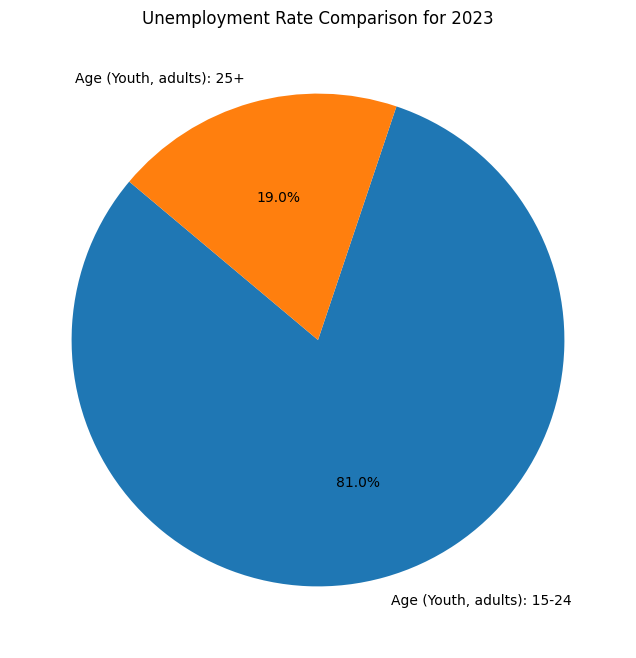

In [11]:
# URL of the CSV file
url = 'https://raw.githubusercontent.com/HAZCHEM234/My_data/main/Gender%20and%20age%20unemployment%20rate.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Filter the DataFrame for the year 2023
df_2023 = df[df['time'] == 2023]

# Extract the unemployment rates for the age groups 15-24 and 25+
age_groups = df_2023[df_2023['classif1.label'].isin(['Age (Youth, adults): 15-24', 'Age (Youth, adults): 25+'])]

# Extract the labels and values for the pie chart
labels = age_groups['classif1.label'].values
values = age_groups['obs_value'].values

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Unemployment Rate Comparison for 2023')
plt.show()